In [4]:
%cd ./Stanage/users/acp21rjf/long-context-asr/eval/results

[Errno 2] No such file or directory: './Stanage/users/acp21rjf/long-context-asr/eval/results'
/home/robertflynn/Stanage/users/acp21rjf/long-context-asr/eval/results


In [6]:
!ls

eval_config_wd.yaml    evals_rb.csv	 wer_pos_earnings.pdf
eval.ipynb	       evals_rb_sp1.csv  werr_rb_across_datasets.pdf
evals_fourier_pos.csv  evals_rb_sp2.csv
evals_no_rotary.csv    evals_wd.csv


In [7]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np

In [8]:
csv.loc[csv['seq_len'] == 1024].iloc[0].checkpoint

NameError: name 'csv' is not defined

In [9]:
csv = pd.read_csv('evals_rb.csv', sep=',')

In [21]:
csv.loc[csv['dataset'] == 'tedlium_concat'].loc[csv['split'] == 'dev']

,Unnamed: 0,dataset,split,wer,name,checkpoint,repeat,single_utterance,seq_len,overlap_ratio,model_class,cache_len
145,0,tedlium_concat,dev,0.077705,rb_n_seq_sched,/mnt/parscratch/users/acp21rjf/spotify/checkpo...,1,False,1024,0.875,SCConformerXL,-1
146,0,tedlium_concat,dev,0.076932,rb_n_seq_sched,/mnt/parscratch/users/acp21rjf/spotify/checkpo...,2,False,1024,0.875,SCConformerXL,-1
147,0,tedlium_concat,dev,0.071405,rb_n_seq_sched,/mnt/parscratch/users/acp21rjf/spotify/checkpo...,1,False,2048,0.875,SCConformerXL,-1


In [24]:
csv.loc[csv['dataset'] == 'tedlium'].loc[csv['split'] == 'dev'].loc[csv['seq_len'] == 1024]

,Unnamed: 0,dataset,split,wer,name,checkpoint,repeat,single_utterance,seq_len,overlap_ratio,model_class,cache_len
121,0,tedlium,dev,0.077595,rb_n_seq_sched,/mnt/parscratch/users/acp21rjf/spotify/checkpo...,1,False,1024,0.875,SCConformerXL,-1
122,0,tedlium,dev,0.078369,rb_n_seq_sched,/mnt/parscratch/users/acp21rjf/spotify/checkpo...,2,False,1024,0.875,SCConformerXL,-1


In [20]:
seq_lens = csv['seq_len'].unique().tolist()
print(seq_lens)

out_data_wd = {}
out_data_rb = {}
out_data = {}
for seq_len in seq_lens:
    sset = csv.loc[csv['dataset'] == 'tedlium_concat'].loc[csv['split'] == 'dev'].loc[csv['seq_len'] == seq_len]
    if len(sset) == 3:
        out_data[seq_len] = {'wer': sset['wer'].mean()*100, 'std': sset['wer'].std()*100}
    else:
        print(f'Sequence length {seq_len} has {len(sset)} results')
    # wdsset = sset.loc[sset['name'].str.startswith('w')]
    # out_data_wd[seq_len] = {'wer': wdsset['wer'].mean()*100, 'std': wdsset['wer'].std()*100}
    # rbset = sset.loc[sset['name'].str.startswith('rb')]
    # out_data_rb[seq_len] = {'wer': rbset['wer'].mean()*100, 'std': rbset['wer'].std()*100}

[4096, 8192, 16384, 32768, 65536, 360000, 2048, 131072, 1024, 262144]
Sequence length 4096 has 0 results
Sequence length 8192 has 0 results
Sequence length 16384 has 0 results
Sequence length 32768 has 0 results
Sequence length 65536 has 0 results
Sequence length 360000 has 0 results
Sequence length 2048 has 1 results
Sequence length 131072 has 0 results
Sequence length 1024 has 2 results
Sequence length 262144 has 0 results


In [14]:
def get_percentage_decrease_json(json, min_key=2048):
    min_val = json[min_key]['wer']
    out = {}
    for key in json:
        if key != min_key:
            out[key] = (min_val - json[key]['wer']) / min_val * 100
    return out

In [19]:
out_data

{}

In [92]:
rev16 = out_data

In [90]:
tedlium_test = out_data

In [88]:
earnings_test = out_data

In [104]:
tedlium_test

{4096: {'wer': 6.516628271014234, 'std': 0.08344598445938176},
 8192: {'wer': 6.406757634827807, 'std': 0.09571565526861074},
 16384: {'wer': 6.372496898812684, 'std': 0.14544238545938923},
 32768: {'wer': 6.2366353594423725, 'std': 0.060286376382177445},
 65536: {'wer': 6.19528619528619, 'std': 0.03683255305835054},
 360000: {'wer': 6.1385787701577135, 'std': 0.09296386353786196},
 2048: {'wer': 6.63240593065154, 'std': 0.09010486131806146},
 131072: {'wer': 6.2000118140468965, 'std': 0.0909374701301986},
 262144: {'wer': 6.247268001653961, 'std': 0.09251236080312614}}

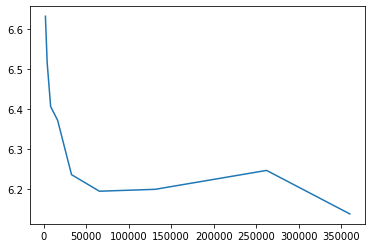

In [115]:
plt.plot(sorted(tedlium_test.keys()), [tedlium_test[key]['wer'] for key in sorted(tedlium_test.keys())], label='TEDLIUM Test')

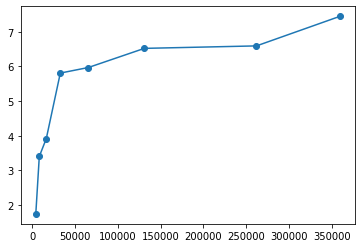

In [114]:
plt.plot(sorted(get_percentage_decrease_json(tedlium_test).keys()), sorted(get_percentage_decrease_json(tedlium_test).values()), label='TEDLIUM Test', marker='o')

In [120]:
2**15

32768

/tmp/ipykernel_6990/527104691.py:1: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.xscale('log', basex=2)


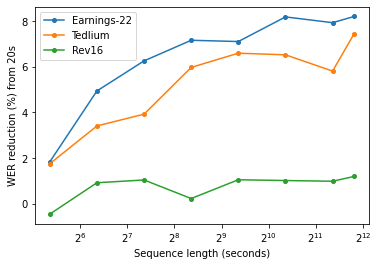

In [145]:
plt.xscale('log', basex=2)
plt.plot([el/100 for el in sorted(get_percentage_decrease_json(earnings_test).keys())], [get_percentage_decrease_json(earnings_test)[key] for key in sorted(get_percentage_decrease_json(earnings_test).keys())], label='Earnings-22', marker='o', markersize=4)
plt.plot([el/100 for el in sorted(get_percentage_decrease_json(tedlium_test).keys())], [get_percentage_decrease_json(tedlium_test)[key] for key in sorted(get_percentage_decrease_json(tedlium_test).keys())], label='Tedlium', marker='o', markersize=4)
plt.plot([el/100 for el in sorted(get_percentage_decrease_json(tedlium_test).keys())], [get_percentage_decrease_json(rev16)[key] for key in sorted(get_percentage_decrease_json(tedlium_test).keys())], label='Rev16', marker='o', markersize=4)

plt.legend()
plt.xlabel('Sequence length (seconds)')
plt.ylabel('WER reduction (%) from 20s')
plt.savefig('werr_rb_across_datasets.pdf', bbox_inches='tight') 
plt.show()

In [61]:
no_pos

{4096: {'wer': 19.720333040595275, 'std': 0.27550147126807834},
 8192: {'wer': 19.47661159106536, 'std': 0.10006167270516933},
 16384: {'wer': 19.286672249113277, 'std': 0.31272326112818755},
 2048: {'wer': 20.557700031996948, 'std': 0.20077883544219124},
 32768: {'wer': 19.091967403958087, 'std': 0.27479400653754593},
 360000: {'wer': 19.20497790848872, 'std': 0.4342514014723085},
 65536: {'wer': 19.000061270755467, 'std': 0.06429375748502734},
 131072: {'wer': 18.922451647162138, 'std': 0.07077884709336803},
 262144: {'wer': 19.456868792081092, 'std': 0.35305245312601996}}

In [64]:
no_pos = out_data

In [22]:
rotary_pos = out_data

In [25]:
fourier_pos = out_data

In [133]:
original_results_earnings_test = [
    20.53, 19.44, 19.24, 18.67, 18.70, 18.61, 18.81
]
seq_lens = [1024, 2048, 4096, 8192, 16384, 32768, 360000]

In [134]:
2**17

131072

/tmp/ipykernel_6990/1112176954.py:2: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.xscale('log', basex=2)


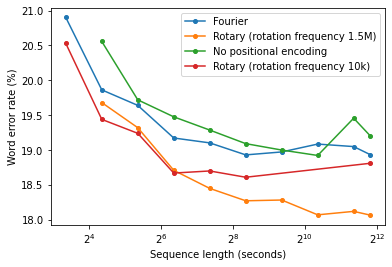

In [141]:
# log scale
plt.xscale('log', basex=2)
plt.plot([el/100 for el in sorted(fourier_pos.keys())], [fourier_pos[k]['wer'] for k in sorted(fourier_pos.keys())], label='Fourier', marker='o', markersize=4)
plt.plot([el/100 for el in sorted(rotary_pos.keys())], [rotary_pos[k]['wer'] for k in sorted(rotary_pos.keys())], label='Rotary (rotation frequency 1.5M)', marker='o', markersize=4)
plt.plot([el/100 for el in sorted(no_pos.keys())], [no_pos[k]['wer'] for k in sorted(no_pos.keys())], label='No positional encoding', marker='o', markersize=4)
plt.plot([el/100 for el in seq_lens], original_results_earnings_test, label='Rotary (rotation frequency 10k)', marker='o', markersize=4)
plt.xlabel('Sequence length (seconds)')
plt.ylabel('Word error rate (%)')
plt.legend()
plt.savefig('wer_pos_earnings.pdf', bbox_inches='tight')
plt.show()

In [9]:
out_data_rb

{}

In [10]:
original_results_earnings_test = [
    20.53, 19.44, 19.24, 18.67, 18.70, 18.61, 18.81
]
seq_lens = [1024, 2048, 4096, 8192, 16384, 32768, 360000]

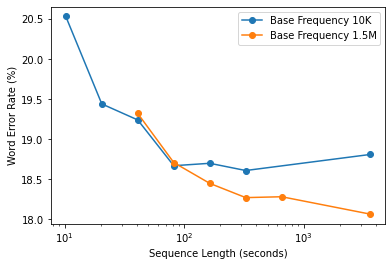

In [11]:
# log x axis
plt.xscale('log')
# add dots at each point
plt.plot([el / 100 for el in seq_lens], original_results_earnings_test, label='Base Frequency 10K', marker='o')
plt.plot([el /100 for el in list(out_data.keys())], [out_data[k]['wer'] for k in out_data.keys()], label='Base Frequency 1.5M', marker='o')
# add dot
plt.xlabel('Sequence Length (seconds)')
plt.ylabel('Word Error Rate (%)')
plt.legend()
#plt.savefig("rb_comparison.pdf")